In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.model_selection import GridSearchCV
from sklearn.impute import KNNImputer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

from math import sqrt
from scipy import stats

In [2]:
sales = pd.read_csv("D:\\MBA - DSBA\\Capstone\\Dataset\\Sales.csv")

In [3]:
#Dimension of data set
sales.shape

(4520, 20)

In [4]:
#Information about the variables
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4520 entries, 0 to 4519
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CustID                4520 non-null   int64  
 1   AgentBonus            4520 non-null   int64  
 2   Age                   4251 non-null   float64
 3   CustTenure            4294 non-null   float64
 4   Channel               4520 non-null   object 
 5   Occupation            4520 non-null   object 
 6   EducationField        4520 non-null   object 
 7   Gender                4520 non-null   object 
 8   ExistingProdType      4520 non-null   int64  
 9   Designation           4520 non-null   object 
 10  NumberOfPolicy        4475 non-null   float64
 11  MaritalStatus         4520 non-null   object 
 12  MonthlyIncome         4284 non-null   float64
 13  Complaint             4520 non-null   int64  
 14  ExistingPolicyTenure  4336 non-null   float64
 15  SumAssured           

In [5]:
sales_na = sales.isna().sum()
sales_na[sales_na.values > 0].sort_values(ascending = False)

Age                     269
MonthlyIncome           236
CustTenure              226
ExistingPolicyTenure    184
SumAssured              154
CustCareScore            52
NumberOfPolicy           45
dtype: int64

In [6]:
sales.describe()["AgentBonus"]

count    4520.000000
mean     4077.838274
std      1403.321711
min      1605.000000
25%      3027.750000
50%      3911.500000
75%      4867.250000
max      9608.000000
Name: AgentBonus, dtype: float64

In [7]:
print(" 0.5% agents recived bonus lower than   ",format(np.percentile(sales["AgentBonus"], 0.5)))
print("    1% agents recived bonus lower than   ",format(np.percentile(sales["AgentBonus"], 1)))
print("    5% agents recived bonus lower than   ",format(np.percentile(sales["AgentBonus"], 5)))
print(" 10% agents recived bonus lower than    ",format(np.percentile(sales["AgentBonus"], 10)))
print(" 90% agents recived bonus lower than   ",format(np.percentile(sales["AgentBonus"], 90)))
print(" 95% agents recived bonus lower than   ",format(np.percentile(sales["AgentBonus"], 95)))
print(" 99% agents recived bonus lower than  ",format(np.percentile(sales["AgentBonus"], 99)))
print(" 99.5% agents recived bonus lower than ",format(np.percentile(sales["AgentBonus"], 99.5)))

 0.5% agents recived bonus lower than    1755.19
    1% agents recived bonus lower than    1876.38
    5% agents recived bonus lower than    2158.0
 10% agents recived bonus lower than     2418.0
 90% agents recived bonus lower than    5917.1
 95% agents recived bonus lower than    6755.500000000002
 99% agents recived bonus lower than   8234.44000000001
 99.5% agents recived bonus lower than  8757.215


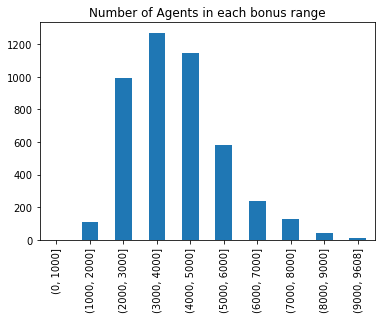

In [8]:
bonus_range = pd.cut(sales["AgentBonus"], 
                     bins = [0, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, sales["AgentBonus"].max()])
sales["Bonus_Range"] = bonus_range
sales["Bonus_Range"].value_counts().sort_index().plot(kind = "bar")
plt.title("Number of Agents in each bonus range")
plt.show()

In [9]:
sales.describe()["Age"]

count    4251.000000
mean       14.494707
std         9.037629
min         2.000000
25%         7.000000
50%        13.000000
75%        20.000000
max        58.000000
Name: Age, dtype: float64

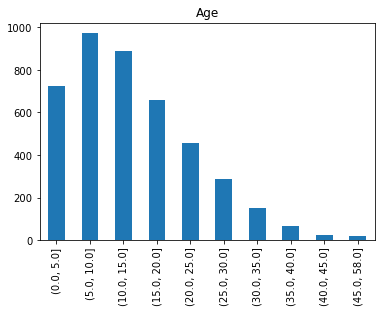

In [10]:
age_range = pd.cut(sales["Age"], 
                     bins = [0,5,10,15,20,25,30,35,40,45, sales["Age"].max()])
sales["Age_Range"] = age_range
sales["Age_Range"].value_counts().sort_index().plot(kind = "bar")
plt.title("Age")
plt.show()

In [11]:
sales.drop(['Age_Range'], axis = 'columns', inplace = True)

Before ['Salaried' 'Free Lancer' 'Small Business' 'Laarge Business'
 'Large Business']
After ['Salaried' 'Free Lancer' 'Small Business' 'Large Business']


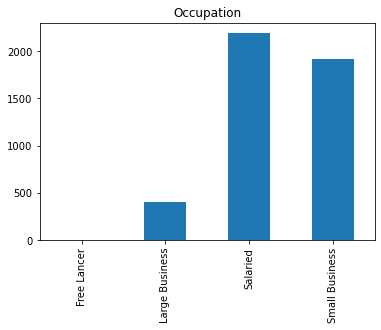

In [12]:
print("Before", sales['Occupation'].unique())
sales.Occupation = sales.Occupation.str.replace('Laarge Business','Large Business')
print("After", sales['Occupation'].unique())
sales["Occupation"].value_counts().sort_index().plot(kind = "bar")
plt.title("Occupation")
plt.show()

Before ['Graduate' 'Post Graduate' 'UG' 'Under Graduate' 'Engineer' 'Diploma'
 'MBA']
After ['Graduate' 'Post Graduate' 'Under Graduate' 'Diploma']


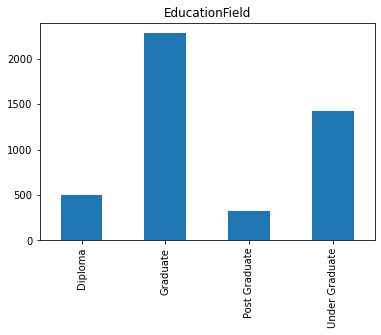

In [13]:
print("Before",sales['EducationField'].unique())
sales.EducationField = sales.EducationField.str.replace('UG','Under Graduate')
sales.EducationField = sales.EducationField.str.replace('Engineer','Graduate')
sales.EducationField = sales.EducationField.str.replace('MBA','Post Graduate')
print("After",sales['EducationField'].unique())
sales["EducationField"].value_counts().sort_index().plot(kind = "bar")
plt.title("EducationField")
plt.show()

Before ['Female' 'Male' 'Fe male']
After ['Female' 'Male']


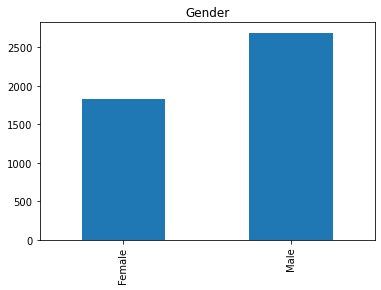

In [14]:
print("Before",sales['Gender'].unique())
sales.Gender = sales.Gender.str.replace(' ', '')
print("After",sales['Gender'].unique())
sales["Gender"].value_counts().sort_index().plot(kind = "bar")
plt.title("Gender")
plt.show()

Before ['Manager' 'Exe' 'Executive' 'VP' 'AVP' 'Senior Manager']
After ['Manager' 'Exe' 'VP' 'AVP' 'Senior Manager']


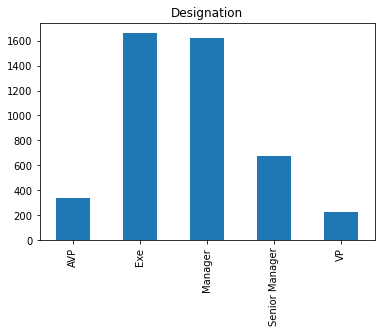

In [15]:
print("Before",sales['Designation'].unique())
sales.Designation = sales.Designation.str.replace('Executive','Exe')
print("After",sales['Designation'].unique())
sales["Designation"].value_counts().sort_index().plot(kind = "bar")
plt.title("Designation")
plt.show()

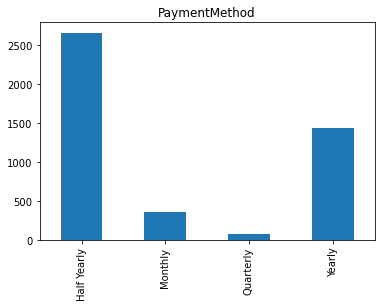

In [16]:
sales["PaymentMethod"].value_counts().sort_index().plot(kind = "bar")
plt.title("PaymentMethod")
plt.show()

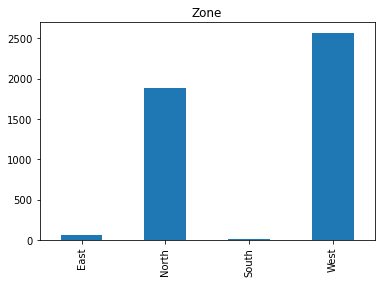

In [17]:
sales["Zone"].value_counts().sort_index().plot(kind = "bar")
plt.title("Zone")
plt.show()

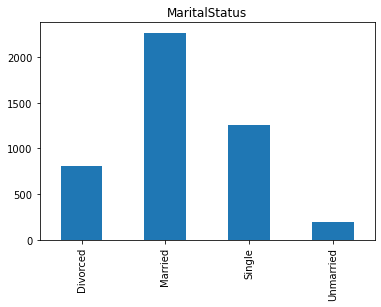

In [18]:
sales["MaritalStatus"].value_counts().sort_index().plot(kind = "bar")
plt.title("MaritalStatus")
plt.show()

In [19]:
Corr_Matrix = sales.corr()
print(Corr_Matrix)

                        CustID  AgentBonus       Age  CustTenure  \
CustID                1.000000    0.192393  0.087781    0.109229   
AgentBonus            0.192393    1.000000  0.559481    0.561344   
Age                   0.087781    0.559481  1.000000    0.328627   
CustTenure            0.109229    0.561344  0.328627    1.000000   
ExistingProdType      0.419359    0.113023  0.070555    0.079891   
NumberOfPolicy        0.255752    0.076448  0.042143    0.045021   
MonthlyIncome         0.308011    0.612196  0.354162    0.344911   
Complaint             0.001921    0.014281  0.021888    0.003807   
ExistingPolicyTenure  0.104306    0.392415  0.216259    0.214984   
SumAssured            0.164116    0.854257  0.474434    0.474610   
LastMonthCalls        0.122144    0.199708  0.114670    0.115993   
CustCareScore        -0.034891    0.022860  0.035694    0.011145   

                      ExistingProdType  NumberOfPolicy  MonthlyIncome  \
CustID                        0.419359    

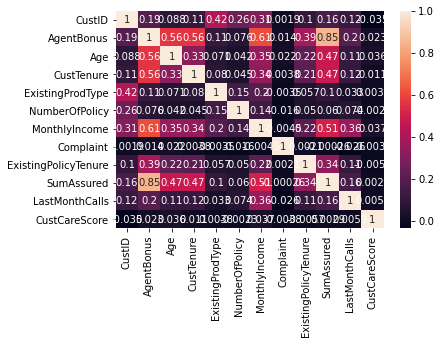

In [20]:
sn.heatmap(Corr_Matrix, annot=True)
plt.show()

<AxesSubplot:xlabel='Age', ylabel='Bonus_Range'>

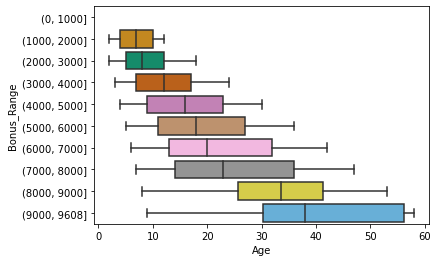

In [21]:
sn.boxplot(y='Bonus_Range', x='Age', 
                 data=sales, 
                 palette="colorblind")

<AxesSubplot:xlabel='CustTenure', ylabel='Bonus_Range'>

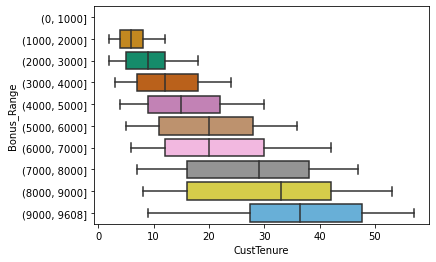

In [22]:
sn.boxplot(y='Bonus_Range', x='CustTenure', 
                 data=sales, 
                 palette="colorblind")

<AxesSubplot:xlabel='ExistingProdType', ylabel='Bonus_Range'>

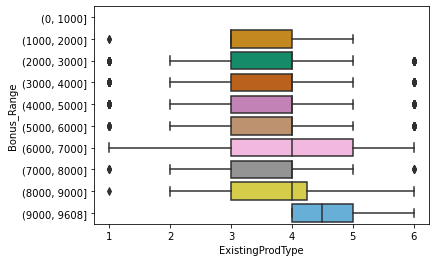

In [23]:
sn.boxplot(y='Bonus_Range', x='ExistingProdType', 
                 data=sales, 
                 palette="colorblind")

<AxesSubplot:xlabel='NumberOfPolicy', ylabel='Bonus_Range'>

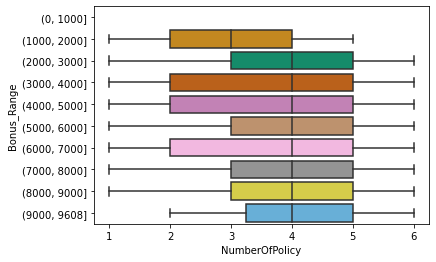

In [24]:
sn.boxplot(y='Bonus_Range', x='NumberOfPolicy', 
                 data=sales, 
                 palette="colorblind")

<AxesSubplot:xlabel='MonthlyIncome', ylabel='Bonus_Range'>

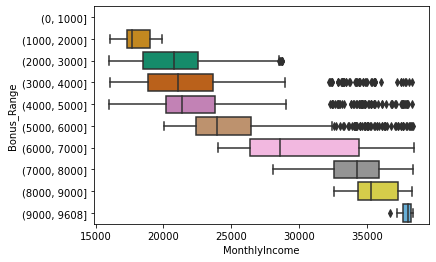

In [25]:
sn.boxplot(y='Bonus_Range', x='MonthlyIncome', 
                 data=sales, 
                 palette="colorblind")

<AxesSubplot:xlabel='ExistingPolicyTenure', ylabel='Bonus_Range'>

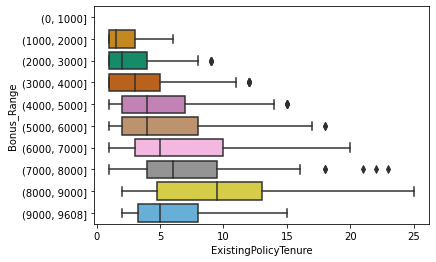

In [26]:
sn.boxplot(y='Bonus_Range', x='ExistingPolicyTenure', 
                 data=sales, 
                 palette="colorblind")

<AxesSubplot:xlabel='SumAssured', ylabel='Bonus_Range'>

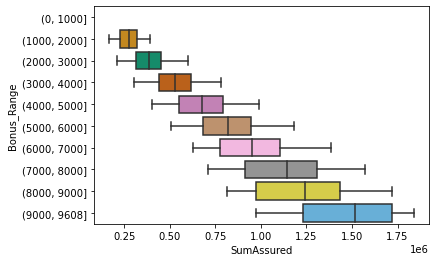

In [27]:
sn.boxplot(y='Bonus_Range', x='SumAssured', 
                 data=sales, 
                 palette="colorblind")

<AxesSubplot:xlabel='LastMonthCalls', ylabel='Bonus_Range'>

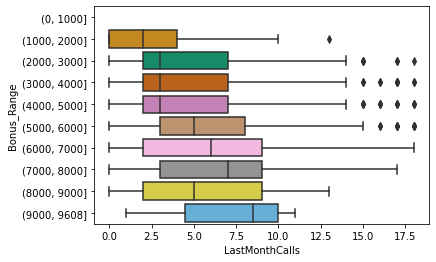

In [28]:
sn.boxplot(y='Bonus_Range', x='LastMonthCalls', 
                 data=sales, 
                 palette="colorblind")

In [29]:
sales.drop(['Bonus_Range'], axis = 'columns', inplace = True)

In [30]:
sales.drop(['Age'], axis = 'columns', inplace = True)

In [31]:
sales.drop(['CustID'], axis = 'columns', inplace = True)

In [32]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4520 entries, 0 to 4519
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   AgentBonus            4520 non-null   int64  
 1   CustTenure            4294 non-null   float64
 2   Channel               4520 non-null   object 
 3   Occupation            4520 non-null   object 
 4   EducationField        4520 non-null   object 
 5   Gender                4520 non-null   object 
 6   ExistingProdType      4520 non-null   int64  
 7   Designation           4520 non-null   object 
 8   NumberOfPolicy        4475 non-null   float64
 9   MaritalStatus         4520 non-null   object 
 10  MonthlyIncome         4284 non-null   float64
 11  Complaint             4520 non-null   int64  
 12  ExistingPolicyTenure  4336 non-null   float64
 13  SumAssured            4366 non-null   float64
 14  Zone                  4520 non-null   object 
 15  PaymentMethod        

In [33]:
sales_na = sales.isna().sum()
sales_na[sales_na.values > 0].sort_values(ascending = False)

MonthlyIncome           236
CustTenure              226
ExistingPolicyTenure    184
SumAssured              154
CustCareScore            52
NumberOfPolicy           45
dtype: int64

In [34]:
sales_list = []
for i in range(0, sales.shape[1]):
     
    if(sales.iloc[:,i].dtypes == 'object'):
        sales.iloc[:,i] = pd.Categorical(sales.iloc[:,i])
        #print(marketing_train[[i]])
        sales.iloc[:,i] = sales.iloc[:,i].cat.codes 
        sales.iloc[:,i] = sales.iloc[:,i].astype('object')
         
        sales_list.append(sales.columns[i])
        

In [35]:
sales = pd.DataFrame(KNNImputer(n_neighbors=10, weights="uniform").fit_transform(sales), columns = sales.columns)

In [36]:
sales.isnull().values.any()

False

In [37]:
X = sales[sales.columns.difference(['AgentBonus'])]
y = sales["AgentBonus"]
X.head(5)
y.head(5)

0    4409.0
1    2214.0
2    4273.0
3    1791.0
4    2955.0
Name: AgentBonus, dtype: float64

In [38]:
sales = pd.get_dummies(sales)

In [39]:
print(sales)

      AgentBonus  CustTenure  Channel  Occupation  EducationField  Gender  \
0         4409.0         4.0      0.0         2.0             1.0     0.0   
1         2214.0         2.0      2.0         2.0             1.0     1.0   
2         4273.0         4.0      0.0         0.0             2.0     1.0   
3         1791.0         5.9      2.0         2.0             1.0     0.0   
4         2955.0         9.3      0.0         3.0             3.0     1.0   
...          ...         ...      ...         ...             ...     ...   
4515      3953.0         8.0      0.0         3.0             1.0     1.0   
4516      2939.0         9.0      0.0         2.0             3.0     0.0   
4517      3792.0        23.0      0.0         2.0             1.0     0.0   
4518      4816.0        10.0      1.0         3.0             1.0     0.0   
4519      4764.0        10.0      0.0         2.0             3.0     0.0   

      ExistingProdType  Designation  NumberOfPolicy  MaritalStatus  \
0    

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=4)

In [41]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(3028, 17) (1492, 17) (3028,) (1492,)


In [55]:
train = X_train
train['AgentBonus'] = pd.Series(y_train)
model = smf.ols(formula = 'AgentBonus ~ CustTenure + Channel + Occupation + EducationField + Gender + ExistingProdType + Designation + NumberOfPolicy + MaritalStatus + MonthlyIncome + Complaint + ExistingPolicyTenure + SumAssured + Zone + PaymentMethod + LastMonthCalls + CustCareScore',data = train)
res = model.fit()
y_pred_mlr1 = res.predict(X_test)
print_model = res.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:             AgentBonus   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     713.2
Date:                Sun, 13 Feb 2022   Prob (F-statistic):               0.00
Time:                        18:59:38   Log-Likelihood:                -23782.
No. Observations:                3028   AIC:                         4.760e+04
Df Residuals:                    3010   BIC:                         4.771e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept              114.8151 

<ipython-input-55-701d99c84855>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['AgentBonus'] = pd.Series(y_train)


In [56]:
model = smf.ols(formula = 'AgentBonus ~ CustTenure + Channel + Occupation + ExistingProdType + Designation + MonthlyIncome + Complaint + ExistingPolicyTenure + SumAssured + Zone + PaymentMethod + LastMonthCalls + CustCareScore',data = train)
res = model.fit()
y_pred_mlr2 = res.predict(X_test)
print_model = res.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:             AgentBonus   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     933.8
Date:                Sun, 13 Feb 2022   Prob (F-statistic):               0.00
Time:                        18:59:41   Log-Likelihood:                -23782.
No. Observations:                3028   AIC:                         4.759e+04
Df Residuals:                    3014   BIC:                         4.768e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept              102.5648 

In [57]:
model = smf.ols(formula = 'AgentBonus ~ CustTenure + Occupation + ExistingProdType + Designation + MonthlyIncome + Complaint + ExistingPolicyTenure + SumAssured + Zone + PaymentMethod + CustCareScore',data = train)
res = model.fit()
y_pred_mlr3 = res.predict(X_test)
print_model = res.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:             AgentBonus   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     1104.
Date:                Sun, 13 Feb 2022   Prob (F-statistic):               0.00
Time:                        18:59:42   Log-Likelihood:                -23783.
No. Observations:                3028   AIC:                         4.759e+04
Df Residuals:                    3016   BIC:                         4.766e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept              106.8576 

In [59]:
knn_model = KNeighborsRegressor(n_neighbors=10)
knn_model.fit(X_train, y_train)
y_pred_KNN1 = knn_model.predict(X_train)

In [60]:
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_KNN2 = knn_model.predict(X_train)

In [61]:
knn_model = KNeighborsRegressor(n_neighbors=3)
knn_model.fit(X_train, y_train)
y_pred_KNN3 = knn_model.predict(X_train)

In [62]:
parameters = {"n_neighbors": range(1, 50)}
gridsearch = GridSearchCV(KNeighborsRegressor(), parameters)
gridsearch.fit(X_train, y_train)

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': range(1, 50)})

In [63]:
gridsearch.best_params_

{'n_neighbors': 3}

In [65]:
test_preds_grid = gridsearch.predict(X_train)
test_mse = mean_squared_error(y_train, test_preds_grid)
test_rmse = sqrt(test_mse)
test_rmse

406.14398107406316

In [ ]:
mse_mlr1 = mean_squared_error(y_test, y_pred_mlr1)
mse_mlr2 = mean_squared_error(y_test, y_pred_mlr2)
mse_mlr3 = mean_squared_error(y_test, y_pred_mlr3)
mse_KNN1 = mean_squared_error(y_train, y_pred_KNN1)
mse_KNN2 = mean_squared_error(y_train, y_pred_KNN2)
mse_KNN3 = mean_squared_error(y_train, y_pred_KNN3)

print("----------------------------------------------------------------------------------------------------")
print("Mean Squared error ")
print("----------------------------------------------------------------------------------------------------")
print("Multiple Linear Regression 1 : " , mse_mlr1)
print("Multiple Linear Regression 2 : " , mse_mlr2)
print("Multiple Linear Regression 3 : " , mse_mlr3)
print("----------------------------------------------------------------------------------------------------")
print("k Nearest Neighbours (KNN with k = 10): " , mse_KNN1)
print("k Nearest Neighbours (KNN with k = 5): " , mse_KNN2)
print("k Nearest Neighbours (KNN with k = 3): " , mse_KNN3)
print("----------------------------------------------------------------------------------------------------")

In [ ]:
rmse_mlr1 = sqrt(mse_mlr1)
rmse_mlr2 = sqrt(mse_mlr2)
rmse_mlr3 = sqrt(mse_mlr3)
rmse_KNN1 = sqrt(mse_KNN1)
rmse_KNN2 = sqrt(mse_KNN2)
rmse_KNN3 = sqrt(mse_KNN3)
print("----------------------------------------------------------------------------------------------------")
print("Root Mean Squared error ")
print("----------------------------------------------------------------------------------------------------")
print("Multiple Linear Regression 1 : " , rmse_mlr1)
print("Multiple Linear Regression 2 : " , rmse_mlr2)
print("Multiple Linear Regression 3 : " , rmse_mlr3)
print("----------------------------------------------------------------------------------------------------")
print("k Nearest Neighbours (KNN with k = 10): " , rmse_KNN1)
print("k Nearest Neighbours (KNN with k = 5): " , rmse_KNN2)
print("k Nearest Neighbours (KNN with k = 3): " , rmse_KNN3)
print("----------------------------------------------------------------------------------------------------")